# **Proiect Predicție popularitate melodii - ML**

## **Încărcarea setului de date în notebook**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('SpotifyFeatures.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


### **Ștergem valorile nule**

In [2]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [3]:
df.dropna(axis=0, how='any', inplace=True)


In [4]:
df.dropna(axis=1, how='any', inplace=True)


In [5]:
df_result = df.dropna(subset=['track_name'])

In [6]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## **Prepararea datelor**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232724.0,41.127490,18.189986,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232724.0,0.368562,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232724.0,0.554366,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232724.0,235121.845568,118935.926327,15387.00000,182856.2500,220427.000000,265768.0000,5552917.000
energy,232724.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232724.0,0.148302,0.302769,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232724.0,0.215010,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232724.0,-9.569896,5.998215,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232724.0,0.120765,0.185519,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232724.0,117.666494,30.898942,30.37900,92.9590,115.777500,139.0545,242.903


In [8]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232724 non-null  float64
 16  time_signature    232724 

### **Reprezentarea grafică a distribuției popularității în setul de date**

Text(0.5, 1.0, 'Distrbuția popularității')

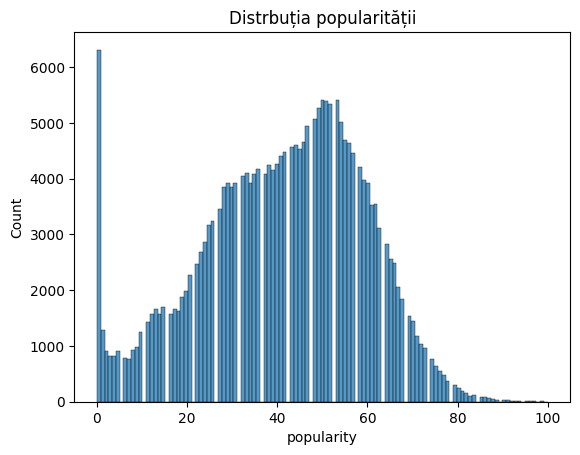

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['popularity']).set_title('Distrbuția popularității')

## **Top 10 artiști în funcție de numărul de cântece**

In [59]:
artist_counts = df['artist_name'].value_counts()
artist_counts

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: count, Length: 14564, dtype: int64

In [60]:
top_artists = artist_counts.head(10)
top_artists

artist_name
Giuseppe Verdi             1394
Giacomo Puccini            1137
Kimbo Children's Music      971
Nobuo Uematsu               825
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Juice Music                 684
Johann Sebastian Bach       632
Name: count, dtype: int64

### **Top 10 genuri de muzică**

In [61]:
genre_counts = df['genre'].value_counts()
genre_counts

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9095
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

In [62]:
top_genre = genre_counts.head(10)
top_genre

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: count, dtype: int64

In [40]:
genre_popularity = df.groupby('genre')['popularity'].mean()

top_genres = genre_popularity.sort_values(ascending=False)

top_genres

genre
A Capella           0.0
Jazz                0.0
Soundtrack          0.0
Soul                0.0
Ska                 0.0
Rock                0.0
Reggaeton           0.0
Reggae              0.0
Rap                 0.0
R&B                 0.0
Pop                 0.0
Opera               0.0
Movie               0.0
Indie               0.0
Alternative         0.0
Hip-Hop             0.0
Folk                0.0
Electronic          0.0
Dance               0.0
Country             0.0
Comedy              0.0
Classical           0.0
Children’s Music    0.0
Children's Music    0.0
Blues               0.0
Anime               0.0
World               0.0
Name: popularity, dtype: float64

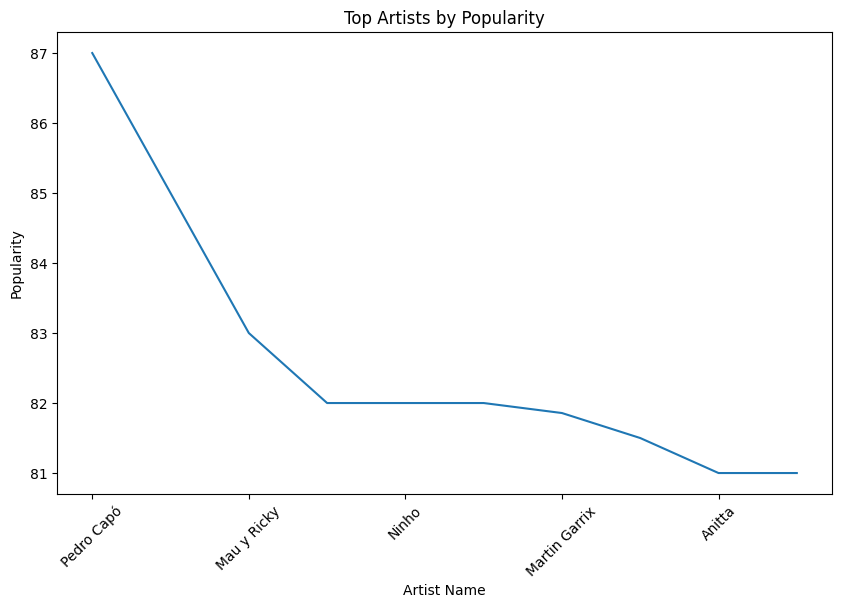

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by artist and calculate mean popularity
grouped_df = df.groupby('artist_name')['popularity'].mean()

# Get the top artists by popularity
top_artists = grouped_df.nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_artists.plot(kind='line')
plt.xlabel('Artist Name')
plt.ylabel('Popularity')
plt.title('Top Artists by Popularity')
plt.xticks(rotation=45)
plt.show()


In [18]:
import pandas as pd

# Group by artist and calculate mean popularity
grouped_df = df.groupby('artist_name')['popularity'].mean()

# Get the top artists by popularity
top_artists = grouped_df.nlargest(10)

# Print the top artists
print(top_artists)


artist_name
Pedro Capó              87.000000
Mario Bautista          85.000000
Mau y Ricky             83.000000
Kris Kross Amsterdam    82.000000
Ninho                   82.000000
Paloma Mami             82.000000
Martin Garrix           81.857143
Sofia Reyes             81.500000
Anitta                  81.000000
Heuss L'enfoiré         81.000000
Name: popularity, dtype: float64


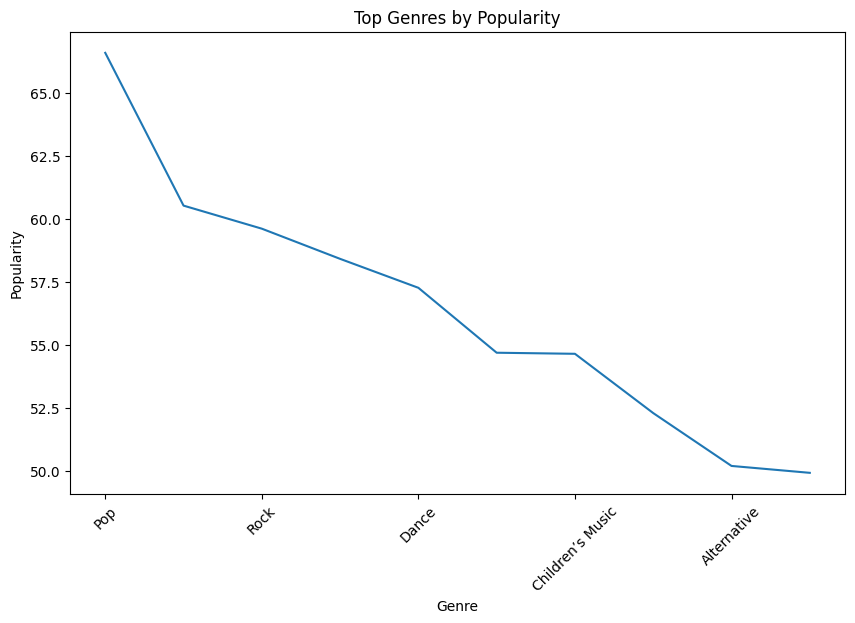

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by artist and calculate mean popularity
grouped_df = df.groupby('genre')['popularity'].mean()

# Get the top artists by popularity
top_genres = grouped_df.nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_genres.plot(kind='line')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Top Genres by Popularity')
plt.xticks(rotation=45)
plt.show()

In [22]:
import pandas as pd

# Group by artist and calculate mean popularity
grouped_df = df.groupby('genre')['popularity'].mean()

# Get the top artists by popularity
top_genres = grouped_df.nlargest(10)

# Print the top genres
print(top_genres)


genre
Pop                 66.590667
Rap                 60.533795
Rock                59.619392
Hip-Hop             58.423131
Dance               57.275256
Indie               54.701561
Children’s Music    54.659040
R&B                 52.308719
Alternative         50.213430
Folk                49.940209
Name: popularity, dtype: float64


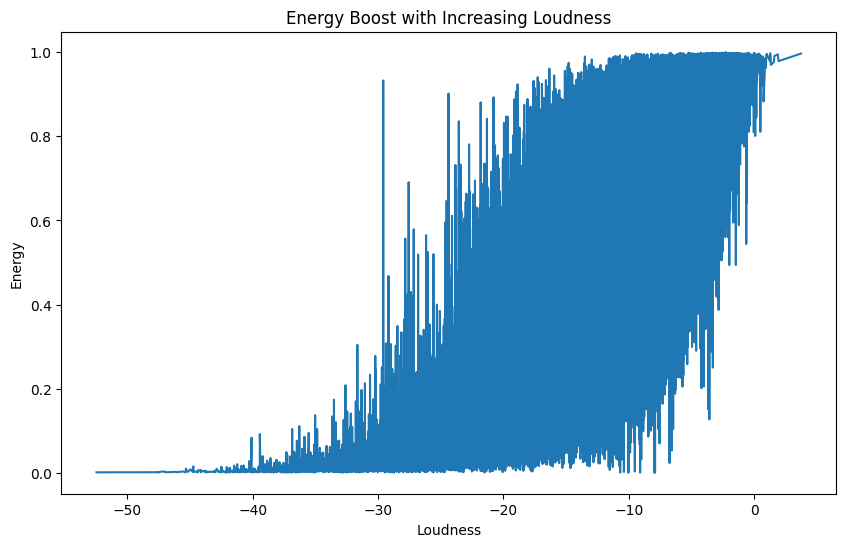

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Sort by loudness
df_sorted = df.sort_values(by='loudness')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['loudness'], df_sorted['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Energy Boost with Increasing Loudness')
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, y= "loudness", x = "energy", color = "c").set(title="loudness vs Energy")

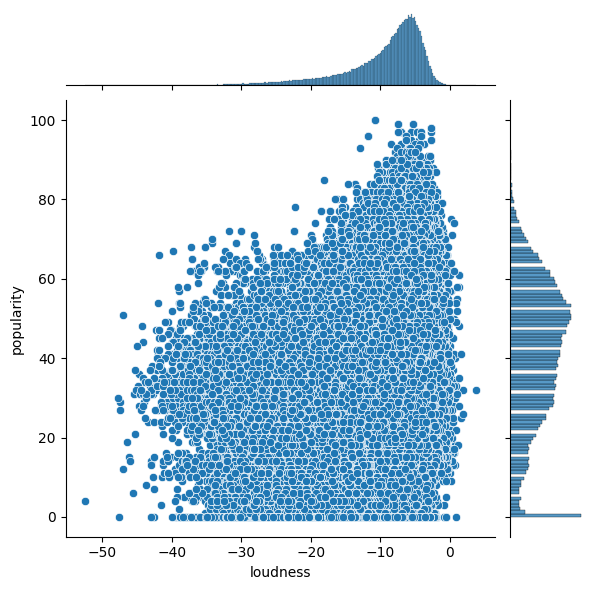

In [64]:
sns.jointplot(x = 'loudness', y = 'popularity', data = df)

# **Calcurea index-ului Gini**

In [26]:
import numpy as np

def gini(array):

    # transformam array-ul intr-un numpy array pentru a putea folosi funcții specifice
    array = np.array(popularity, dtype=np.float64)
    # sortam array-ul
    sorted_array = array[np.argsort(popularity)]
    # numarul total de elemente in array
    n = len(array)
    # calculam index-ul Gini
    
    coefficient = 2 * np.sum(np.arange(1, n + 1) * sorted_array) / (n * np.sum(sorted_array)) - (n + 1) / n
    return coefficient

popularity = df['popularity']
popularity = popularity.values
gini_index = gini(popularity) 
print("Gini index pentru popularitate:", gini_index)




Gini index pentru popularitate: 0.25069803654696377


In [27]:

import numpy as np

def gini(array):

    # transformam array-ul intr-un numpy array pentru a putea folosi funcții specifice
    array = np.array(danceability, dtype=np.float64)
    # sortam array-ul
    sorted_array = array[np.argsort(danceability)]
    # numarul total de elemente in array
    n = len(array)
    # calculam index-ul Gini
    
    coefficient = 2 * np.sum(np.arange(1, n + 1) * sorted_array) / (n * np.sum(sorted_array)) - (n + 1) / n
    return coefficient

danceability = df['danceability']
danceability = danceability.values
gini_index = gini(danceability) 
print("Gini index pentru danceability:", gini_index)

Gini index pentru danceability: 0.18969256159379366


In [28]:

import numpy as np

def gini(array):

    # transformam array-ul intr-un numpy array pentru a putea folosi funcții specifice
    array = np.array(energy, dtype=np.float64)
    # sortam array-ul
    sorted_array = array[np.argsort(energy)]
    # numarul total de elemente in array
    n = len(array)
    # calculam index-ul Gini
    
    coefficient = 2 * np.sum(np.arange(1, n + 1) * sorted_array) / (n * np.sum(sorted_array)) - (n + 1) / n
    return coefficient

energy = df['energy']
energy = energy.values
gini_index = gini(energy) 
print("Gini index pentru energy:", gini_index)

Gini index pentru energy: 0.2633176132869215


## **Entropia într-o coloană din set-ul de date**


In [29]:
from scipy.stats import entropy

def calculate_entropy(data):
    # calculam frecventele valorilor
    value_counts = data.value_counts()
    # calculam probabilitatile valorilor
    probabilities = value_counts / len(data)
    # calculam entropia
    entropy_value = entropy(probabilities, base=2)
    return entropy_value



In [30]:
target_entropy = calculate_entropy(df['popularity'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  6.109085800917653


In [31]:
target_entropy = calculate_entropy(df['energy'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  10.100551656840294


In [32]:
target_entropy = calculate_entropy(df['danceability'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  9.551921529124074


In [33]:
target_entropy = calculate_entropy(df['loudness'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  14.044113673859895


In [34]:
target_entropy = calculate_entropy(df['track_id'])
print("Entropia coloanei țintă: ", target_entropy)

Entropia coloanei țintă:  17.25921039242899


In [35]:
target_entropy = calculate_entropy(df['genre'])
print("Entropia coloanei țintă: ", target_entropy)

Entropia coloanei țintă:  4.697628980171278


# **Matrice de corelație**


In [9]:
# selectam doar coloanele numerice
df_numeric = df.select_dtypes(include=[np.number])

# calculam matricea de corelatie
correlation_matrix = df_numeric.corr()

# Afișăm matricea de corelație
print(correlation_matrix)

                  popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.381295      0.256567     0.002347   
acousticness       -0.381295      1.000000     -0.364554     0.011207   
danceability        0.256567     -0.364554      1.000000    -0.125776   
duration_ms         0.002347      0.011207     -0.125776     1.000000   
energy              0.248922     -0.725580      0.325806    -0.030548   
instrumentalness   -0.210983      0.316153     -0.364946     0.076023   
liveness           -0.167995      0.069001     -0.041688     0.023785   
loudness            0.363011     -0.690202      0.438673    -0.047620   
speechiness        -0.151076      0.150933      0.134558    -0.016169   
tempo               0.081039     -0.238245      0.021943    -0.028459   
valence             0.060078     -0.325807      0.547150    -0.141806   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.2109

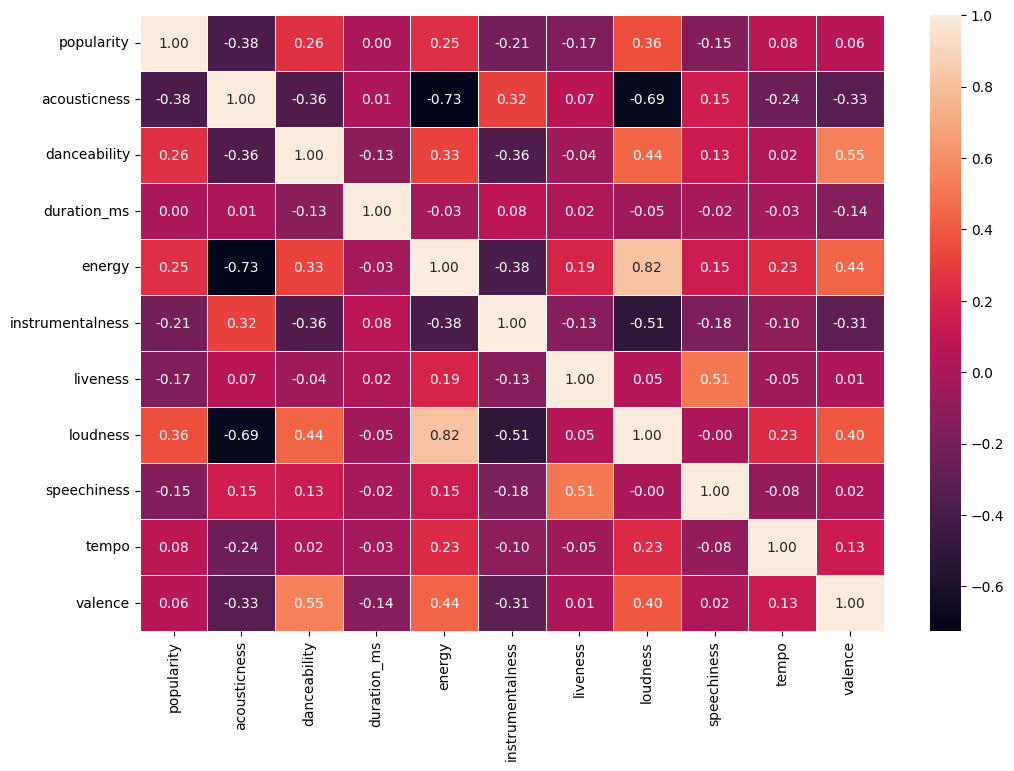

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# cream un heatmap pentru matricea de corelatie
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)

# afisam heatmap-ul
plt.show()

### **Conversia valorilor de tip string in valori numerice**

In [10]:
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
159699,Reggaeton,Almighty,Dinero,4whWV1l3Lycyu4wpvDR92I,39,0.1990,0.685,195684,0.584,0.000000,8,0.3370,-5.741,Major,0.2560,146.998,4/4,0.824
15911,Dance,Ella Henderson,Ghost,2FiceoWDJ67rrmb5tGBpgE,65,0.0464,0.682,216107,0.836,0.000003,10,0.0797,-3.777,Major,0.0425,104.987,4/4,0.485
4712,Alternative,Joyce Manor,Constant Headache,6baeAT0jVAxvnLn8rIN50X,53,0.0467,0.410,184307,0.892,0.000000,11,0.2460,-4.289,Major,0.1240,99.016,4/4,0.451
41909,Folk,Steely Dan,Any Major Dude Will Tell You,7BVIm4yj3PQ6MwTPwcjka6,59,0.6500,0.686,188147,0.421,0.000000,8,0.0792,-14.909,Major,0.0430,80.213,4/4,0.538
141102,Indie,Andreas Moe,Ocean - Stripped Acoustic,77o0diCQA70xYZnOey5OeD,50,0.8210,0.560,157056,0.393,0.000000,0,0.0933,-9.924,Minor,0.0305,93.038,4/4,0.580


In [11]:
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
225869,Rock,David Bowie,The Jean Genie - 2013 Remastered Version,6uZtMNTfU5u8w6fsnXeOdb,62,0.378000,0.580,248013,0.571,0.000005,10,0.3580,-9.116,1,0.0321,128.150,4/4,0.8180
33340,Anime,Konomi Suzuki,Curiosity(Live Style),2H1SWmdDLh6nAy46rX187P,22,0.000891,0.599,297767,0.907,0.150000,7,0.0830,-3.614,1,0.0591,140.016,4/4,0.6820
43827,Folk,The Head and the Heart,All We Ever Knew - Recorded at Spotify Studios...,0PHm9MrfZdEUasfd1XC0n2,54,0.069500,0.460,228587,0.825,0.000015,2,0.3370,-5.203,1,0.0310,100.137,4/4,0.4430
62428,Folk,Carole King,Smackwater Jack,0PrW6YZOBGeukTkvJsSIV3,47,0.445000,0.656,221880,0.552,0.000269,4,0.0822,-8.881,1,0.0315,125.795,4/4,0.7690
64834,Folk,Andy Shauf,Wendell Walker,5NpiojbPGLVmxiszru8FcX,41,0.678000,0.448,503347,0.275,0.001470,5,0.1020,-12.138,0,0.0400,109.486,4/4,0.0766


In [12]:
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
79359,Opera,Giacomo Puccini,"Tosca - Act 3: ""E lucevan le stelle""",251uotpdxTQUEiKMjdJAjk,12,0.968,0.251,197733,0.120,0.000013,11,0.1040,-16.475,0,0.0410,81.328,0,0.0707
196726,Soul,John Legend,Tomorrow,0LoL9e5uLLtjYOx41TRcxE,41,0.145,0.617,212987,0.572,0.000000,10,0.2930,-9.199,0,0.0257,83.768,0,0.6590
172543,Comedy,Todd Glass,Watermelon Festival,4b8gQRpydWMznugZEGS2mf,18,0.844,0.514,181893,0.923,0.000000,8,0.9560,-2.865,1,0.8580,146.401,0,0.6680
216852,World,Fela Kuti,O.D.O.O. - Edit,7yEPnFUTRWmfrLGLu24DRz,27,0.668,0.870,414933,0.710,0.000003,4,0.0823,-7.117,1,0.1130,115.286,0,0.6420
212442,Country,Austin Burke,Slower,0i2qj6IvyogojhQZRoJ80J,68,0.251,0.697,184640,0.531,0.000125,8,0.0954,-7.141,1,0.0268,99.980,0,0.6310


# **Modele pentru predicție**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [14]:
df = pd.get_dummies(df, columns=['genre'])

features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"] + list(df.columns[df.columns.str.startswith('genre_')])

## **Se împarte setul de date în două părți (antrenare și test)**

In [15]:
training = df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = df.drop(training.index)[features]

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [17]:
print(X_train.isnull().any())

acousticness              False
danceability              False
duration_ms               False
energy                    False
instrumentalness          False
key                       False
liveness                  False
mode                      False
speechiness               False
tempo                     False
time_signature            False
valence                   False
genre_A Capella           False
genre_Alternative         False
genre_Anime               False
genre_Blues               False
genre_Children's Music    False
genre_Children’s Music    False
genre_Classical           False
genre_Comedy              False
genre_Country             False
genre_Dance               False
genre_Electronic          False
genre_Folk                False
genre_Hip-Hop             False
genre_Indie               False
genre_Jazz                False
genre_Movie               False
genre_Opera               False
genre_Pop                 False
genre_R&B                 False
genre_Ra

In [18]:
# Check for NaN values in each column of training set
print("NaN values in training set:")
print(X_train.isna().sum())

# Check for NaN values in each column of testing set
print("\nNaN values in testing set:")
print(X_valid.isna().sum())

NaN values in training set:
acousticness              0
danceability              0
duration_ms               0
energy                    0
instrumentalness          0
key                       0
liveness                  0
mode                      0
speechiness               0
tempo                     0
time_signature            0
valence                   0
genre_A Capella           0
genre_Alternative         0
genre_Anime               0
genre_Blues               0
genre_Children's Music    0
genre_Children’s Music    0
genre_Classical           0
genre_Comedy              0
genre_Country             0
genre_Dance               0
genre_Electronic          0
genre_Folk                0
genre_Hip-Hop             0
genre_Indie               0
genre_Jazz                0
genre_Movie               0
genre_Opera               0
genre_Pop                 0
genre_R&B                 0
genre_Rap                 0
genre_Reggae              0
genre_Reggaeton           0
genre_Rock          

R-squared (R2) Score: 0.7224
Linear Regression Model evaluation score (R-squared) percentage: 72.2351%
Eroarea media patratica (MSE): 92.3117
Eroarea media patratica (MSE) cu procentaj: 9231.1735%
Popularitate prezisa pentru melodia random: 3.7277
Popularitate prezisa pentru melodia random cu procentaj: 372.7650%
Popularitate actuala pentru melodia random: 3.0000


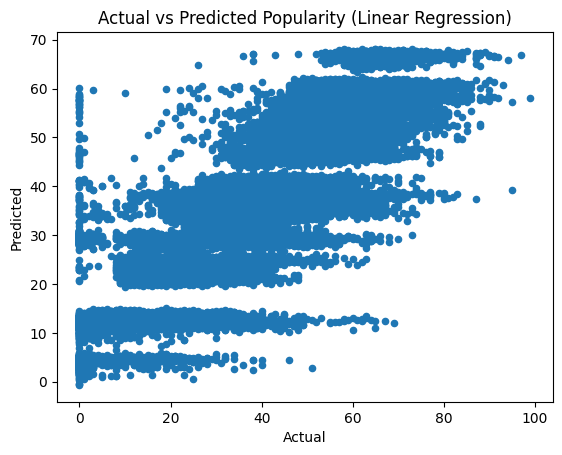

In [20]:
import matplotlib.pyplot as plt
# Inițializăm modelul de regresie liniară
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# facem predicții pe setul de validare
linreg_Predict = linreg.predict(X_valid)

 # Calculăm scorul R-squared (R2) 
r2_score = linreg.score(X_valid, y_valid)
print(f"R-squared (R2) Score: {r2_score:.4f}")
print(f"Linear Regression Model evaluation score (R-squared) percentage: {r2_score * 100:.4f}%")

# Calculăm eroarea medie pătratică (MSE)
mse = mean_squared_error(y_valid, linreg_Predict)
print(f"Eroarea media patratica (MSE): {mse:.4f}")
print(f"Eroarea media patratica (MSE) cu procentaj: {mse * 100:.4f}%")

# Selectam o melodie random
random_song = df.sample(1)

specific_song_features = random_song[features]

# Prezicem scorul de popularitate
predicted_popularity = linreg.predict(specific_song_features)

print(f"Popularitate prezisa pentru melodia random: {predicted_popularity[0]:.4f}")
predicted_popularity_percentage = predicted_popularity[0] * 100
print(f"Popularitate prezisa pentru melodia random cu procentaj: {predicted_popularity_percentage:.4f}%")

# Obținem scorul de popularitate actual
actual_popularity = random_song['popularity'].values[0]
print(f"Popularitate actuala pentru melodia random: {actual_popularity:.4f}")

evaluation_linreg = pd.DataFrame({'Actual': y_valid, 'Predicted': linreg_Predict})
evaluation_linreg.plot(kind = 'scatter', x = 'Actual', y = 'Predicted', title = 'Actual vs Predicted Popularity (Linear Regression)')
plt.show()

R-squared (R2) Score: 0.7313
RFR Model evaluation score (R-squared) percentage: 73.1299%
Mean Squared Error: 89.3369
Popularitatea prezisa pentru o melodie specifica: 85.6200
Actual Popularity for the Specific Song: 100.0000


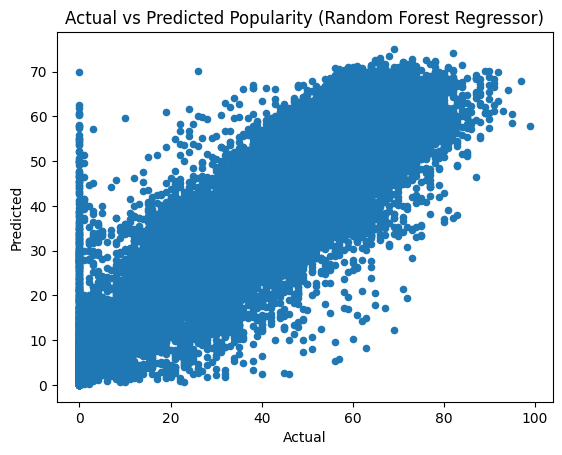

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Make predictions on the validation set
rfr_Predict = rfr.predict(X_valid)

# Calculate the R-squared (R2) score
r2_score = rfr.score(X_valid, y_valid)
print(f"R-squared (R2) Score: {r2_score:.4f}")
print(f"RFR Model evaluation score (R-squared) percentage: {r2_score * 100:.4f}%")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, rfr_Predict)
print(f"Mean Squared Error: {mse:.4f}")

specific_song_features = df[df['track_name'] == '7 rings'][features]

# Predict the popularity score
predicted_popularity = rfr.predict(specific_song_features)

print(f"Popularitatea prezisa pentru o melodie specifica: {predicted_popularity[0]:.4f}")
predicted_popularity_percentage = predicted_popularity[0] * 100

# Retrieve the actual popularity score
actual_popularity = df[df['track_name'] == '7 rings']['popularity'].values[0]
print(f"Actual Popularity for the Specific Song: {actual_popularity:.4f}")

evaluare_rfr = pd.DataFrame({'Actual': y_valid, 'Predicted': rfr_Predict})
evaluare_rfr.plot(kind = 'scatter', x = 'Actual', y = 'Predicted', title = 'Actual vs Predicted Popularity (Random Forest Regressor)')
plt.show()


R-squared (R2) Score: 0.7299
RFR Model evaluation score (R-squared) percentage: 72.9950%
Mean Squared Error: 89.7854
Predicted popularity for the specific song: 73.2235
Actual Popularity for the Specific Song: 100.0000


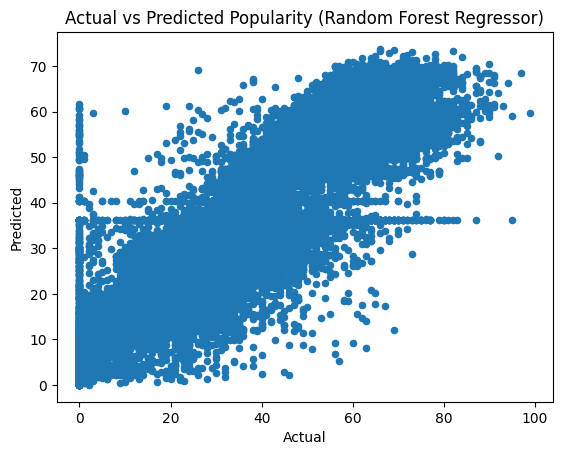

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model with the optimal hyperparameters
rfr = RandomForestRegressor(n_estimators=int(80), max_depth=int(19), random_state=42)

# Fit the model
rfr.fit(X_train, y_train)

# Make predictions on the validation set
rfr_Predict = rfr.predict(X_valid)

# Calculate the R-squared (R2) score
r2_score = rfr.score(X_valid, y_valid)
print(f"R-squared (R2) Score: {r2_score:.4f}")
print(f"RFR Model evaluation score (R-squared) percentage: {r2_score * 100:.4f}%")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, rfr_Predict)
print(f"Mean Squared Error: {mse:.4f}")

specific_song_features = df[df['track_name'] == '7 rings'][features]

# Predict the popularity score
predicted_popularity = rfr.predict(specific_song_features)

print(f"Predicted popularity for the specific song: {predicted_popularity[0]:.4f}")
predicted_popularity_percentage = predicted_popularity[0] * 100

# Retrieve the actual popularity score
actual_popularity = df[df['track_name'] == '7 rings']['popularity'].values[0]
print(f"Actual Popularity for the Specific Song: {actual_popularity:.4f}")

evaluare_rfr = pd.DataFrame({'Actual': y_valid, 'Predicted': rfr_Predict})
evaluare_rfr.plot(kind = 'scatter', x = 'Actual', y = 'Predicted', title = 'Actual vs Predicted Popularity (Random Forest Regressor)')
plt.show()	

R-squared (R2) Score: 0.7313
RFR Model evaluation score (R-squared) percentage: 73.1299%
Mean Squared Error: 89.3369
Predicted popularity for the specific song: 85.6200
Actual Popularity for the Specific Song: 100.0000


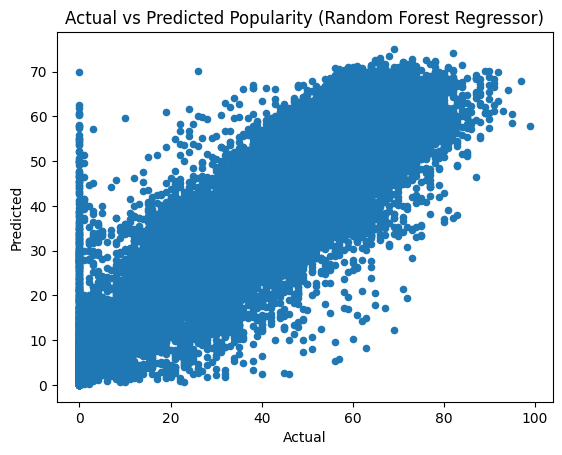

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model with the optimal hyperparameters
rfr = RandomForestRegressor(n_estimators=int(100), random_state=42)

# Fit the model
rfr.fit(X_train, y_train)

# Make predictions on the validation set
rfr_Predict = rfr.predict(X_valid)

# Calculate the R-squared (R2) score
r2_score = rfr.score(X_valid, y_valid)
print(f"R-squared (R2) Score: {r2_score:.4f}")
print(f"RFR Model evaluation score (R-squared) percentage: {r2_score * 100:.4f}%")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, rfr_Predict)
print(f"Mean Squared Error: {mse:.4f}")

specific_song_features = df[df['track_name'] == '7 rings'][features]

# Predict the popularity score
predicted_popularity = rfr.predict(specific_song_features)

print(f"Predicted popularity for the specific song: {predicted_popularity[0]:.4f}")
predicted_popularity_percentage = predicted_popularity[0] * 100

# Retrieve the actual popularity score
actual_popularity = df[df['track_name'] == '7 rings']['popularity'].values[0]
print(f"Actual Popularity for the Specific Song: {actual_popularity:.4f}")

evaluare_rfr = pd.DataFrame({'Actual': y_valid, 'Predicted': rfr_Predict})
evaluare_rfr.plot(kind = 'scatter', x = 'Actual', y = 'Predicted', title = 'Actual vs Predicted Popularity (Random Forest Regressor)')
plt.show()	

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor model
rfr = RandomForestRegressor()

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [22]:
import pandas as pd

new_song_features = pd.DataFrame([{
    'acousticness': 0.5,
    'danceability': 0.7,
    'duration_ms': 200000,
    'energy': 0.8,
    'instrumentalness': 0.0,
    'key': 5,
    'liveness': 0.1,
    'mode': 1,
    'speechiness': 0.05,
    'tempo': 120.0,
    'time_signature': 4,
    'valence': 0.6,
    'genre_A Capella': 0,
    'genre_Alternative': 0,
    'genre_Anime': 0,
    'genre_Blues': 0,
    'genre_Children\'s Music': 0,
    'genre_Children’s Music': 0,
    'genre_Classical': 0,
    'genre_Comedy': 0,
    'genre_Country': 0,
    'genre_Dance': 0,
    'genre_Electronic': 0,
    'genre_Folk': 0,
    'genre_Hip-Hop': 0,
    'genre_Indie': 0,
    'genre_Jazz': 0,
    'genre_Movie': 0,
    'genre_Opera': 0,
    'genre_Pop': 1,
    'genre_R&B': 0,
    'genre_Rap': 0,
    'genre_Reggae': 0,
    'genre_Reggaeton': 0,
    'genre_Rock': 0,
    'genre_Ska': 0,
    'genre_Soul': 0,
    'genre_Soundtrack': 0,
    'genre_World': 0
}])

predicted_popularity = rfr.predict(new_song_features)
print(f"Predicted popularity for the new song: {predicted_popularity[0]:.4f}")


Predicted popularity for the new song: 67.4944


Popularitatea prezisă pentru melodia aleatorie: 37.7694
Procentajul de popularitate prezis pentru melodia aleatorie: 37.77%
Popularitatea actuală pentru melodia aleatorie: 40.0000
Scorul R-pătrat (R2): 0.7040
Scorul de evaluare a modelului XGB (R-pătrat) procentaj: 70.4017%
Eroarea pătratică medie: 98.7754
Popularitatea prezisă pentru noua melodie: 65.0694


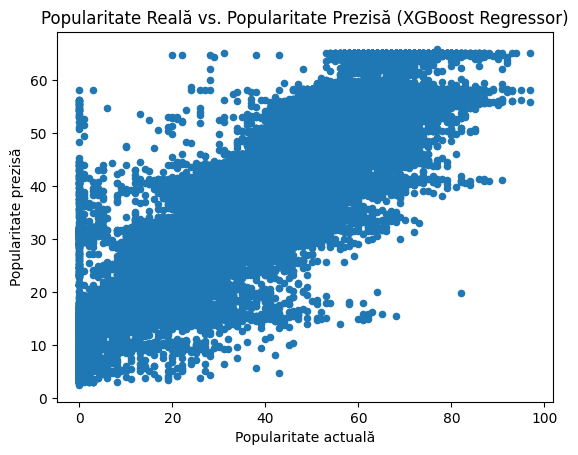

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define the features and target variable
target = 'popularity'
features = df.drop(target, axis=1)

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature']:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))
    label_encoders[column] = le

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor model
xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions on the test set
xgb_Predict = xgb.predict(X_test)

# Select a random song
random_song = df.sample(1)

# Preprocess the features of the random song in the same way as the training data
for column, le in label_encoders.items():
    random_song[column] = le.transform(random_song[column].astype(str))

random_song_features = random_song.drop(target, axis=1)

# Predict the popularity score for the random song
predicted_popularity = xgb.predict(random_song_features)

# Display results in Romanian
print(f"Popularitatea prezisă pentru melodia aleatorie: {predicted_popularity[0]:.4f}")
predicted_popularity_percentage = predicted_popularity[0] 
print(f"Procentajul de popularitate prezis pentru melodia aleatorie: {predicted_popularity_percentage:.2f}%")

# Get the actual popularity score
actual_popularity = random_song[target].values[0]
print(f"Popularitatea actuală pentru melodia aleatorie: {actual_popularity:.4f}")

# Calculate the R-squared (R2) score
r2_score = xgb.score(X_test, y_test)
print(f"Scorul R-pătrat (R2): {r2_score:.4f}")
print(f"Scorul de evaluare a modelului XGB (R-pătrat) procentaj: {r2_score * 100:.4f}%")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, xgb_Predict)
print(f"Eroarea pătratică medie: {mse:.4f}")

# Define new song features
new_song_features = pd.DataFrame([{
    'acousticness': 0.5,
    'danceability': 0.7,
    'duration_ms': 200000,
    'energy': 0.8,
    'instrumentalness': 0.0,
    'key': 5,
    'liveness': 0.1,
    'mode': 1,
    'speechiness': 0.05,
    'tempo': 120.0,
    'time_signature': 4,
    'valence': 0.6,
    'genre_A Capella': 0,
    'genre_Alternative': 0,
    'genre_Anime': 0,
    'genre_Blues': 0,
    'genre_Children\'s Music': 0,
    'genre_Children’s Music': 0,
    'genre_Classical': 0,
    'genre_Comedy': 0,
    'genre_Country': 0,
    'genre_Dance': 0,
    'genre_Electronic': 0,
    'genre_Folk': 0,
    'genre_Hip-Hop': 0,
    'genre_Indie': 0,
    'genre_Jazz': 0,
    'genre_Movie': 0,
    'genre_Opera': 0,
    'genre_Pop': 1,
    'genre_R&B': 0,
    'genre_Rap': 0,
    'genre_Reggae': 0,
    'genre_Reggaeton': 0,
    'genre_Rock': 0,
    'genre_Ska': 0,
    'genre_Soul': 0,
    'genre_Soundtrack': 0,
    'genre_World': 0
}])

# Ensure new song features match training features
for column, le in label_encoders.items():
    if column in new_song_features:
        new_song_features[column] = le.transform(new_song_features[column].astype(str))

# Align columns with the model's expected input
missing_cols = set(X_train.columns) - set(new_song_features.columns)
for col in missing_cols:
    new_song_features[col] = 0
new_song_features = new_song_features[X_train.columns]

# Predict the popularity for the new song
predicted_popularity_new_song = xgb.predict(new_song_features)
print(f"Popularitatea prezisă pentru noua melodie: {predicted_popularity_new_song[0]:.4f}")

evaluare_xgb = pd.DataFrame({'Popularitate actuală': y_test, 'Popularitate prezisă': xgb_Predict})
evaluare_xgb.plot(kind='scatter', x='Popularitate actuală', y='Popularitate prezisă', title='Popularitate Reală vs. Popularitate Prezisă (XGBoost Regressor)')
plt.show()


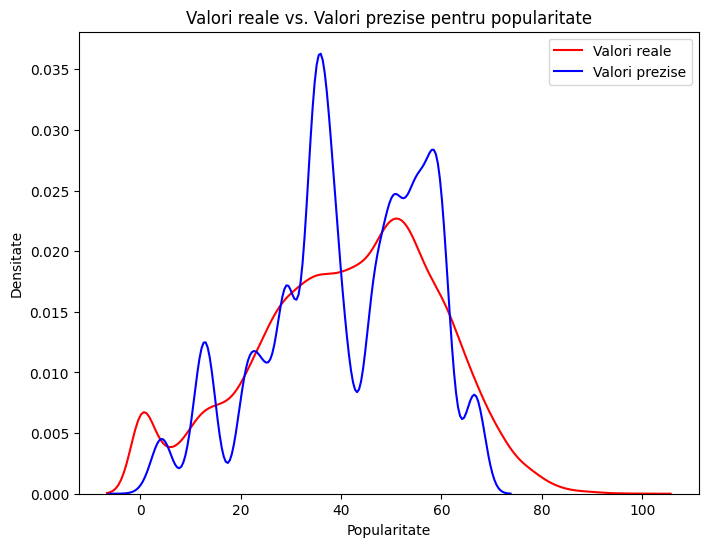

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
linreg_Predict = linreg.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.kdeplot(y_valid, color="r", label="Valori reale")
sns.kdeplot(linreg_Predict, color="b", label="Valori prezise")
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()

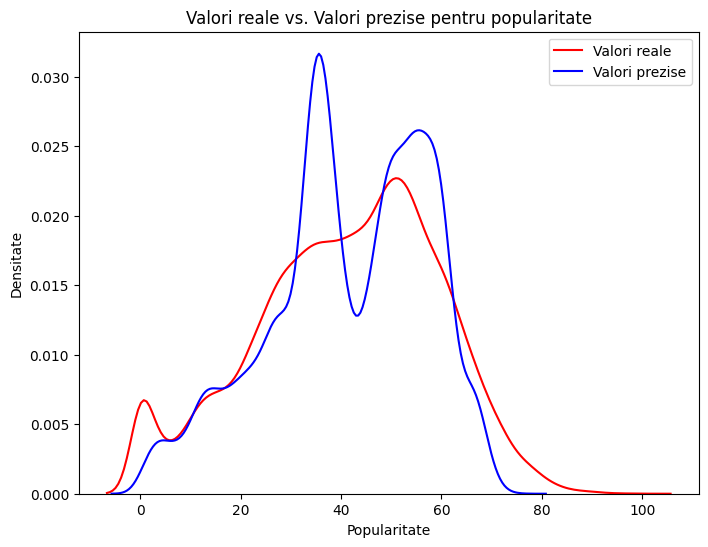

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
rf_predict = rfr.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.kdeplot(y_valid, color="r", label="Valori reale")
sns.kdeplot(rf_predict, color="b", label="Valori prezise")
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()


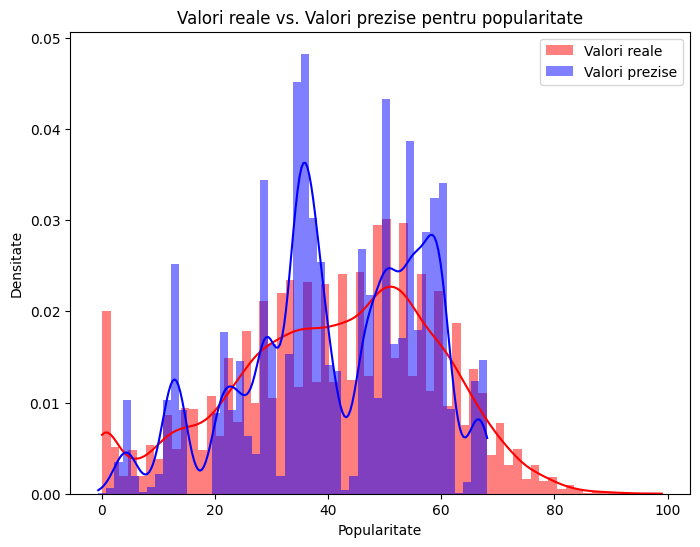

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
linreg_Predict = linreg.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.histplot(y_valid, color="r", label="Valori reale", kde=True, stat="density", linewidth=0)
sns.histplot(linreg_Predict, color="b", label="Valori prezise", kde=True, stat="density", linewidth=0)
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()

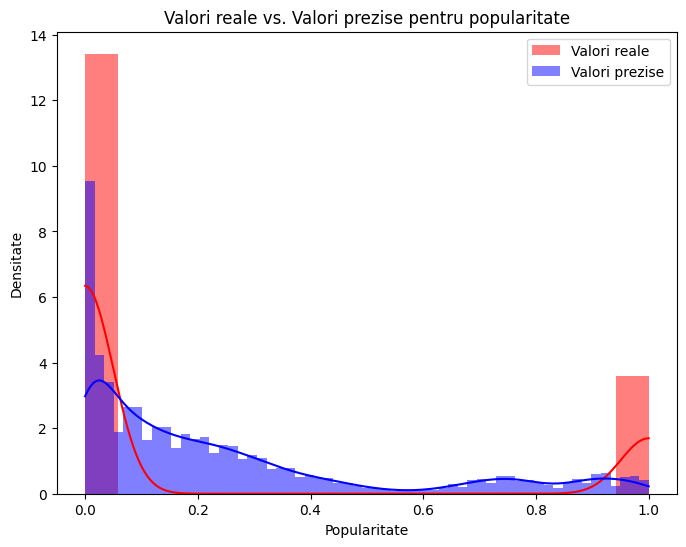

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facem predicții pe setul de validare
rf_predict = rfr.predict(X_valid)

# Creăm un grafic pentru a compara valorile prezise cu cele reale
plt.figure(figsize=(8, 6))
sns.histplot(y_valid, color="r", label="Valori reale", kde=True, stat="density", linewidth=0)
sns.histplot(rf_predict, color="b", label="Valori prezise", kde=True, stat="density", linewidth=0)
plt.title("Valori reale vs. Valori prezise pentru popularitate")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()


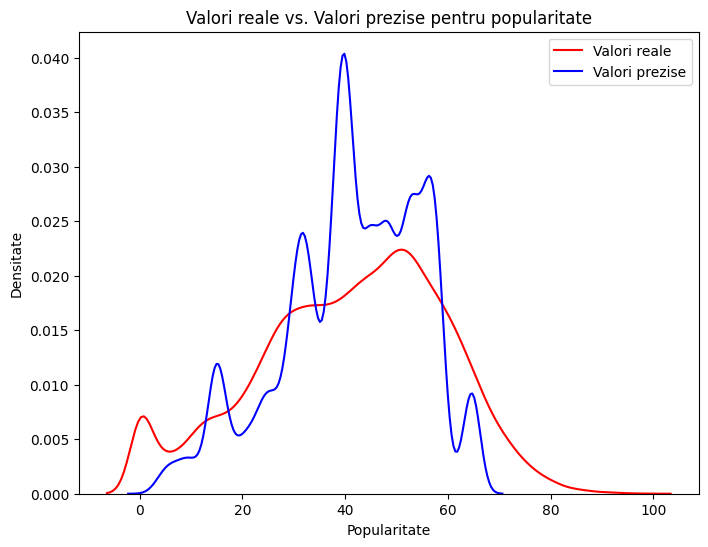

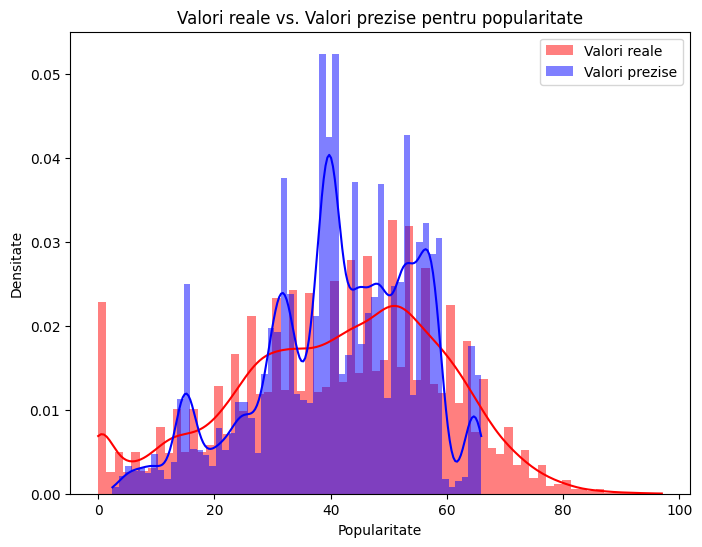

In [35]:
# Visualization 1: KDE plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, color="r", label="Valori reale")
sns.kdeplot(xgb_Predict, color="b", label="Valori prezise")
plt.title("Valori reale vs. Valori prezise pentru popularitate XGBoost Regressor")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()

# Visualization 2: Histogram plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color="r", label="Valori reale", kde=True, stat="density", linewidth=0)
sns.histplot(xgb_Predict, color="b", label="Valori prezise", kde=True, stat="density", linewidth=0)
plt.title("Valori reale vs. Valori prezise pentru popularitate XGBoost Histograma")
plt.xlabel("Popularitate")
plt.ylabel("Densitate")
plt.legend()
plt.show()


## **Optimizarea hiperparametrilor**

In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from hyperopt import fmin, tpe, hp

# Definiți funcția obiectiv pentru optimizarea Bayesiană
def objective(params):
    n_estimators = int(params['n_estimators'])
    max_depth = int(params['max_depth'])
    rfmodel = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rfmodel.fit(X_train, y_train)
    mse = np.mean((rfmodel.predict(X_valid) - y_valid) ** 2)
    return mse

# Definiți spațiul de căutare pentru hiperparametri
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 20, 1)
}

# Rulați optimizarea Bayesiană
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5)

# Afișați cei mai buni hiperparametri găsiți
print("Cei mai buni hiperparametri:")
print(best)



100%|██████████| 5/5 [09:21<00:00, 112.22s/trial, best loss: 0.10138147092311373]
Cei mai buni hiperparametri:
{'max_depth': 19.0, 'n_estimators': 80.0}


In [32]:
# Train a RandomForestRegressor model (assuming you've already trained it)
model = RandomForestRegressor(n_estimators=80, max_depth=19, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by feature importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the top features
print(feature_importance_df.head(10))


             Feature  Importance
0       acousticness    0.159789
4   instrumentalness    0.107665
2        duration_ms    0.107397
11           valence    0.102232
1       danceability    0.101840
8        speechiness    0.099416
9              tempo    0.092344
3             energy    0.090035
6           liveness    0.086597
5                key    0.038896


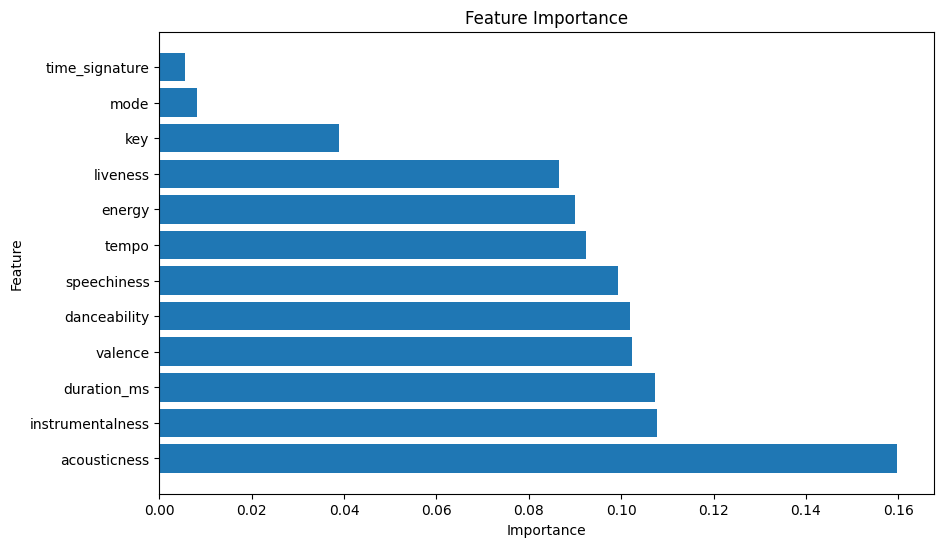

In [33]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


             Feature  Importance
0       acousticness    0.159789
4   instrumentalness    0.107665
2        duration_ms    0.107397
11           valence    0.102232
1       danceability    0.101840
8        speechiness    0.099416
9              tempo    0.092344
3             energy    0.090035
6           liveness    0.086597
5                key    0.038896


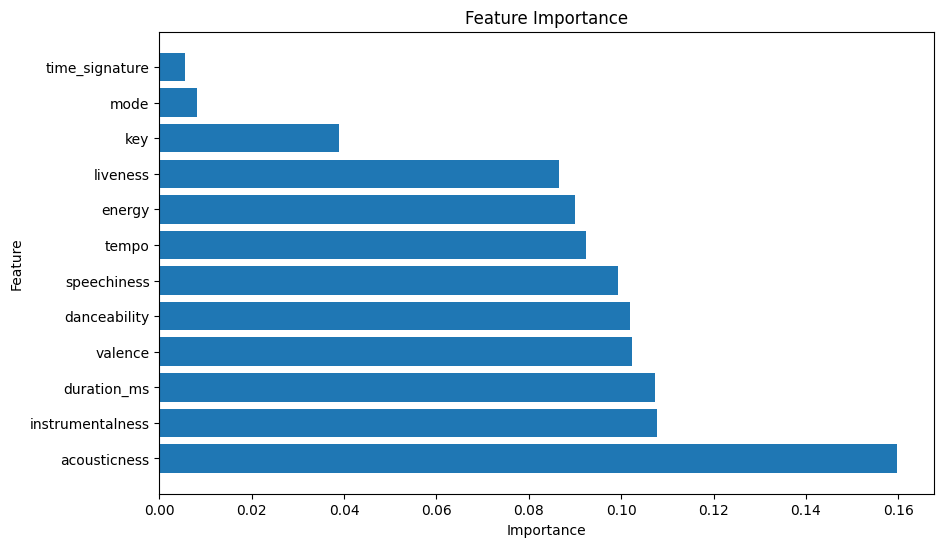

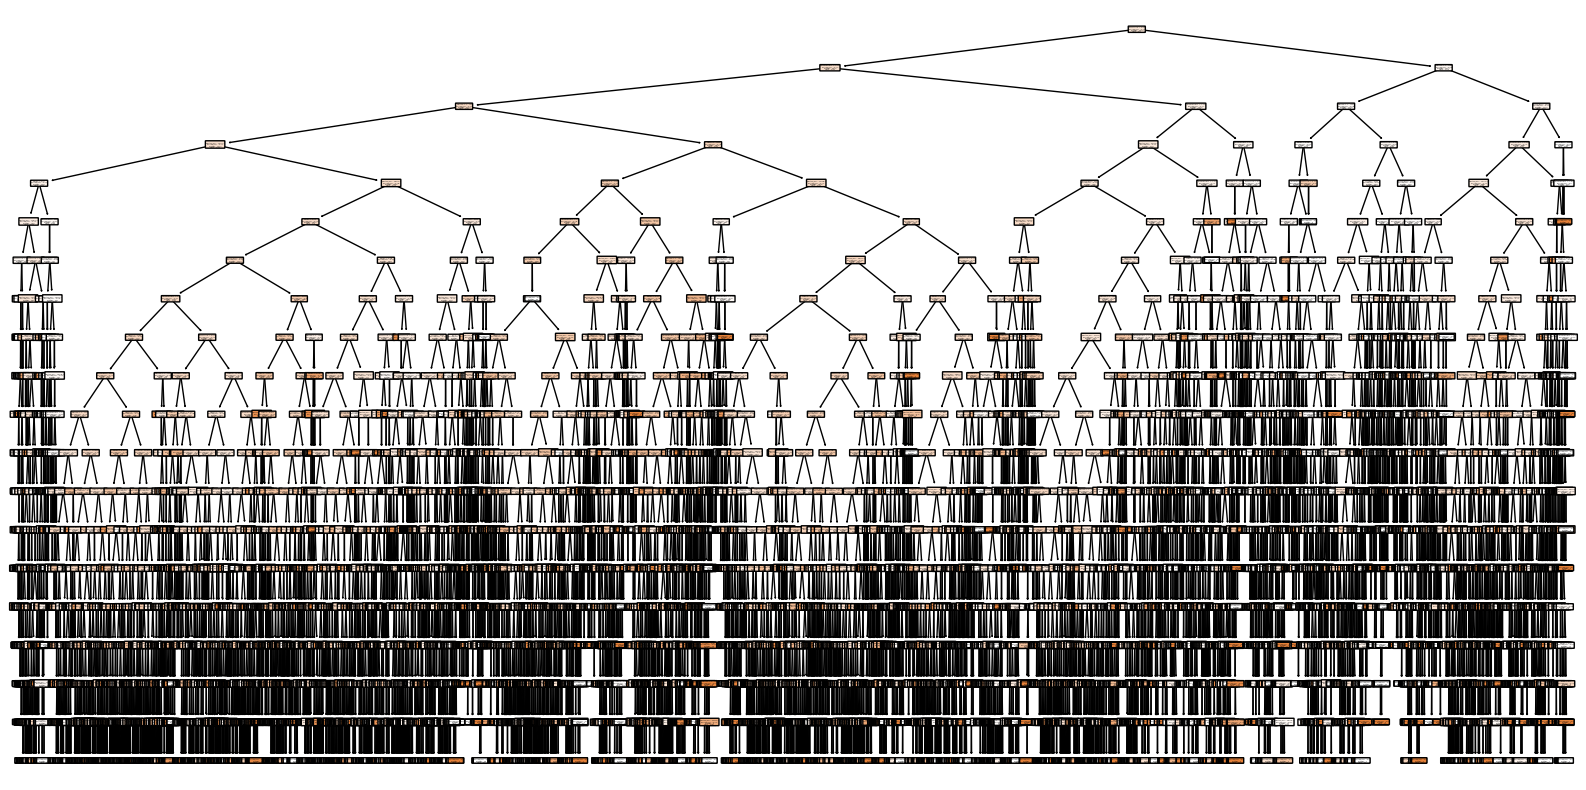

             Feature  Importance
0       acousticness    0.159789
4   instrumentalness    0.107665
2        duration_ms    0.107397
11           valence    0.102232
1       danceability    0.101840
8        speechiness    0.099416
9              tempo    0.092344
3             energy    0.090035
6           liveness    0.086597
5                key    0.038896


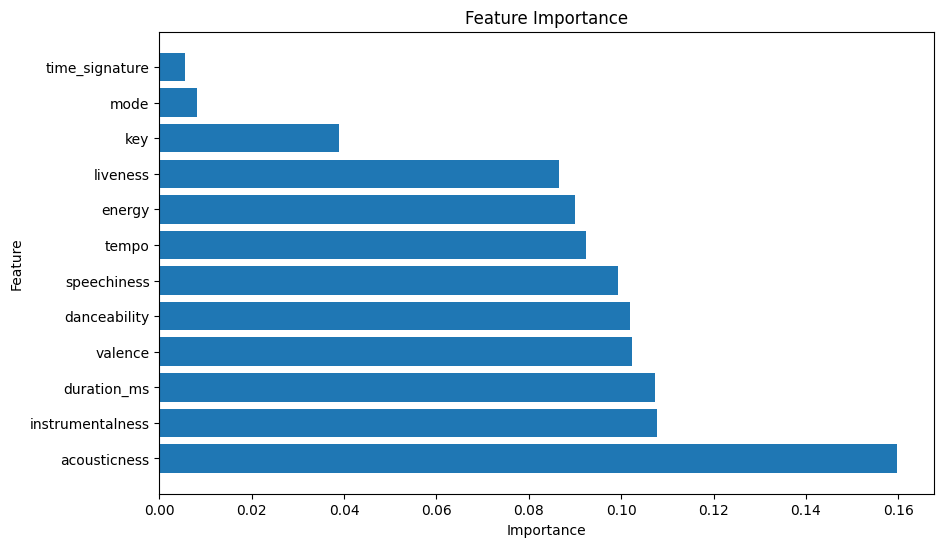

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Train a RandomForestRegressor model (assuming you've already trained it)
model = RandomForestRegressor(n_estimators=80, max_depth=19, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by feature importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the top features
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



# Visualize one of the trees (e.g., the first tree) with higher resolution
plt.figure(figsize=(20, 10), dpi=1000)  # Set dpi to increase resolution
plot_tree(model.estimators_[0], feature_names=features, filled=True, rounded=True)
plt.savefig('decision_tree.png', dpi=1000)  # Save the figure with higher resolution
plt.show()